# ROAD COST ANALYSIS 

## PART I - DATA ANALYSIS

### Introduction
In this part of the project, we will analyze the previously prepared data on road construction costs in Poland.

The original data contains the following columns:

* 'Elementy_rozliczeniowe': Billing elements
* 'Jednostka': Measure unite
* 'Ilosc': Quantity
* 'Cena_jedn': Unit price
* 'Wartosc_calkowita': Total value
* 'Droga': Road number
* 'Rok': Year
* 'Dlugosc_drogi': Road length
* 'Kategoria_robot': Road number
* 'Kategoria_drogi': Category of construction works
* 'Cena_jedn_per_km': Unit price per km
* 'Wartosc_calkowita_per_km': Total value per km

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read the excel file**

In [2]:
road_data = pd.read_excel('..\Projekt_Analiza_Danych\DATA\Road_cost_analysis.xlsx')

**Checking the basic informations of the DataFrame**

In [3]:
road_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Elementy_rozliczeniowe    2097 non-null   object        
 1   Jednostka                 2097 non-null   object        
 2   Ilosc                     2095 non-null   float64       
 3   Cena_jedn                 2097 non-null   float64       
 4   Wartosc_calkowita         2095 non-null   float64       
 5   Droga                     2097 non-null   object        
 6   Rok                       2097 non-null   datetime64[ns]
 7   Dlugosc_drogi             2097 non-null   float64       
 8   Kategoria_robot           2097 non-null   object        
 9   Kategoria_drogi           2097 non-null   object        
 10  Cena_jedn_per_km          2097 non-null   float64       
 11  Wartosc_calkowita_per_km  2095 non-null   float64       
dtypes: datetime64[ns](1)

In [4]:
road_data.head()

,Elementy_rozliczeniowe,Jednostka,Ilosc,Cena_jedn,Wartosc_calkowita,Droga,Rok,Dlugosc_drogi,Kategoria_robot,Kategoria_drogi,Cena_jedn_per_km,Wartosc_calkowita_per_km
0,Odtworzenie trasy i punktów wysokościowych wra...,km,24.24,17413.58,422105.1792,DK12ZW,2019-01-01,24.24,ROBOTY PRZYGOTOWAWCZE,Krajowa,718.382013,17413.580000
1,Ścinanie drzew śr. od 20 do 35 cm wraz z karcz...,szt.,669.00,370.40,247797.6000,DK12ZW,2019-01-01,24.24,ROBOTY PRZYGOTOWAWCZE,Krajowa,15.280528,10222.673267
2,Ścinanie drzew śr. od 36 do 45 cm wraz z karcz...,szt.,77.00,529.66,40783.8200,DK12ZW,2019-01-01,24.24,ROBOTY PRZYGOTOWAWCZE,Krajowa,21.850660,1682.500825
3,Ścinanie drzew śr. 46-55 cm wraz z karczowanie...,szt.,58.00,724.21,42004.1800,DK12ZW,2019-01-01,24.24,ROBOTY PRZYGOTOWAWCZE,Krajowa,29.876650,1732.845710
4,Ścinanie drzew śr. od 56 do 65 cm wraz z karcz...,szt.,59.00,874.60,51601.4000,DK12ZW,2019-01-01,24.24,ROBOTY PRZYGOTOWAWCZE,Krajowa,36.080858,2128.770627


In [5]:
road_data.describe()

,Ilosc,Cena_jedn,Wartosc_calkowita,Dlugosc_drogi,Cena_jedn_per_km,Wartosc_calkowita_per_km
count,2095.00000,2.097000e+03,2.095000e+03,2097.000000,2097.000000,2.095000e+03
mean,13496.18936,1.019424e+04,4.104886e+05,11.519475,1452.994069,4.345102e+04
std,36108.37435,1.755900e+05,1.045110e+06,5.816611,21575.208084,1.169612e+05
min,0.07000,1.170000e+00,2.599000e+01,0.800000,0.062706,1.917596e+00
25%,46.00000,3.279000e+01,1.182688e+04,7.080000,2.848243,1.209782e+03
50%,446.00000,7.356000e+01,6.017949e+04,10.780000,8.569209,6.544069e+03
75%,5647.48500,3.370400e+02,2.869966e+05,12.980000,40.574639,3.041194e+04
max,496551.69000,5.617284e+06,1.423980e+07,24.240000,625000.000000,2.943856e+06


<Figure size 864x576 with 0 Axes>

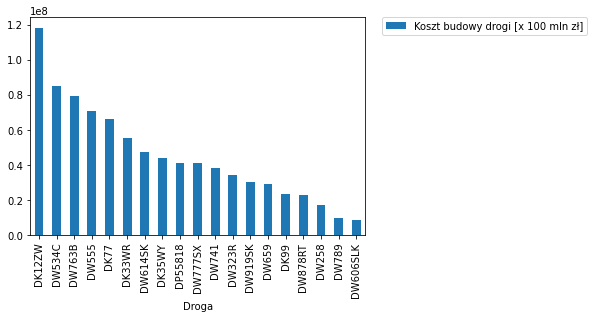

<Figure size 864x576 with 0 Axes>

In [6]:
road_data.groupby(['Droga'], as_index=False).agg({'Wartosc_calkowita': 'sum'}).sort_values(by=['Wartosc_calkowita'],ascending=False).plot.bar(x='Droga', y='Wartosc_calkowita',label='Koszt budowy drogi [x 100 mln zł]',)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

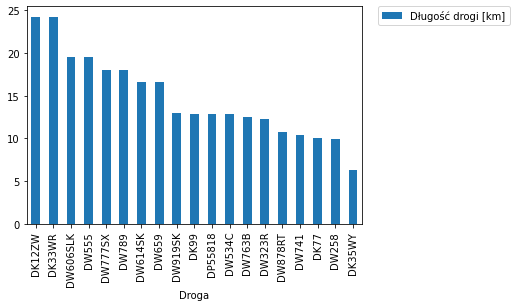

<Figure size 864x576 with 0 Axes>

In [7]:
road_data.groupby(['Droga'], as_index=False).agg({'Dlugosc_drogi': 'max'}).sort_values(by=['Dlugosc_drogi'],ascending=False).plot.bar(x='Droga', y='Dlugosc_drogi',label='Długość drogi [km]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

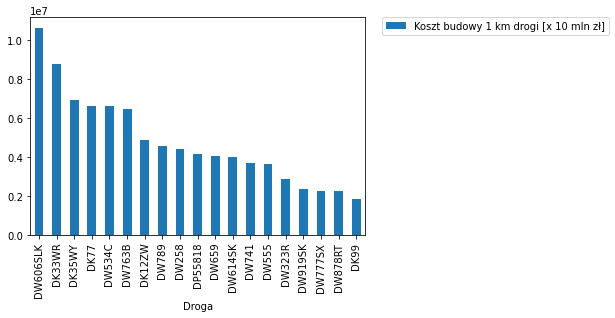

<Figure size 864x576 with 0 Axes>

In [8]:
road_data.groupby(['Droga'], as_index=False).agg({'Wartosc_calkowita_per_km': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km'],ascending=False).plot.bar(x='Droga', y='Wartosc_calkowita_per_km',label='Koszt budowy 1 km drogi [x 10 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

In [12]:
road_data.groupby(['Droga'], as_index=False).agg({'Wartosc_calkowita_per_km': 'sum'}).sort_values(by=['Wartosc_calkowita_per_km'],ascending=False).plot.bar(x='Droga', y='Wartosc_calkowita_per_km',label='Koszt budowy 1 km drogi [x 10 mln zł]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.figure(figsize=(12,8))

,Elementy_rozliczeniowe,Jednostka,Ilosc,Cena_jedn,Wartosc_calkowita,Droga,Rok,Dlugosc_drogi,Kategoria_robot,Kategoria_drogi,Cena_jedn_per_km,Wartosc_calkowita_per_km
